# Phase retrieval for the spider haid dataset using pytorch
Some alternatives are:
> #### 1. GAN, 
<!-- >> similar structure as the tensorflow Ganrec
> #### 2. Unet,
>> output channel of 2 and then propagation, then mean square error
> #### 3. Gan+Unet
>> the output of <b>2</b> will be propagated and input to a descriminator
> #### 4. Transformers
>> flattening and creating a 32x32 or 64x64 sized shapes that will then be inverse propagated, the energy, distance, and pixelsize information from which the phase and attenuation are retrieved. This is then followed by forward propagation and one of the three methods above will continue -->


In [ ]:
from ganrec_dataloader import * 
from utils import *   
from models import *
energy = 11
z = 7.8880960e-2 
pv = 1.04735263e-7 * 4
iter_num = 700

energy = 11
z = 7.8880960e-2
pv = 1.04735263e-7
iter_num = 700
fname_data = 'data/gan_phase/data_spider.tif'

info = {
    'path': None, #path to the folder containing the images or the image itself
    'images': io.imread(fname_data),  #you can insert the image directly as an alternative
    'idx': 2, #list(np.arange(0, 70, 10)), #is the index of the image to be used if there are multiple images in images or path
    'energy_kev': energy,  #energy of the beam
    'detector_pixel_size': pv,  #pixel size of the detector 
    'distance_sample_detector': z, #distance between the sample and the detector
    'pad': 2,            #padding for the images, usually 2 or 4, and helps to reduce the boundary effect
    'alpha': 1e-8,       #multiplies the regularization term
    'iter_num': 100,     #number of iterations
    'init_model': False, #if True, load the model from the model_path
    'output_num': 2,   #number of output images from the generator
    'transform_type': 'reshape', #can be normalize, brightness, contrast, norm, or reshape
    'transform_factor': 0.7, #if brightness, contrast, gamma, sigmoid, norm is chosen, this is the factor
    'file_type': 'tif',  #can be tif or npy, tiff, 
    'device': 'cuda:3',  #can be 'cpu' or 'cuda:x'
    'abs_ratio': 0.05,   #a factor to multiply the generated absorption
    'mode' : 'reflect', #can be reflect, constant, circular
    'value': 'mean',     #used when constant mode is chosen. Either a number or 'mean'
}

args = get_args()                           # get the arguments from the info dictionary, this can be a baseline to start with
args.update(info)                           # update the arguments with the info dictionary
dataloader = Ganrec_Dataloader(**args)      #create the dataloader 
fig = dataloader.visualize(tranformed=True, show_or_plot='show')  #visualize the data


reshape
gen_loss:  tensor(23.5573, device='cuda:3', grad_fn=<AddBackward0>) dis_loss:  tensor(1.5220, device='cuda:3', grad_fn=<AddBackward0>)
gen_loss:  tensor(16.1427, device='cuda:3', grad_fn=<AddBackward0>) dis_loss:  tensor(1.3995, device='cuda:3', grad_fn=<AddBackward0>)
gen_loss:  tensor(15.1961, device='cuda:3', grad_fn=<AddBackward0>) dis_loss:  tensor(1.4049, device='cuda:3', grad_fn=<AddBackward0>)
gen_loss:  tensor(14.1603, device='cuda:3', grad_fn=<AddBackward0>) dis_loss:  tensor(1.4158, device='cuda:3', grad_fn=<AddBackward0>)
gen_loss:  tensor(13.8038, device='cuda:3', grad_fn=<AddBackward0>) dis_loss:  tensor(1.4068, device='cuda:3', grad_fn=<AddBackward0>)
gen_loss:  tensor(13.5364, device='cuda:3', grad_fn=<AddBackward0>) dis_loss:  tensor(1.3890, device='cuda:3', grad_fn=<AddBackward0>)
gen_loss:  tensor(13.2778, device='cuda:3', grad_fn=<AddBackward0>) dis_loss:  tensor(1.3727, device='cuda:3', grad_fn=<AddBackward0>)
gen_loss:  tensor(13.1131, device='cuda:3', gra

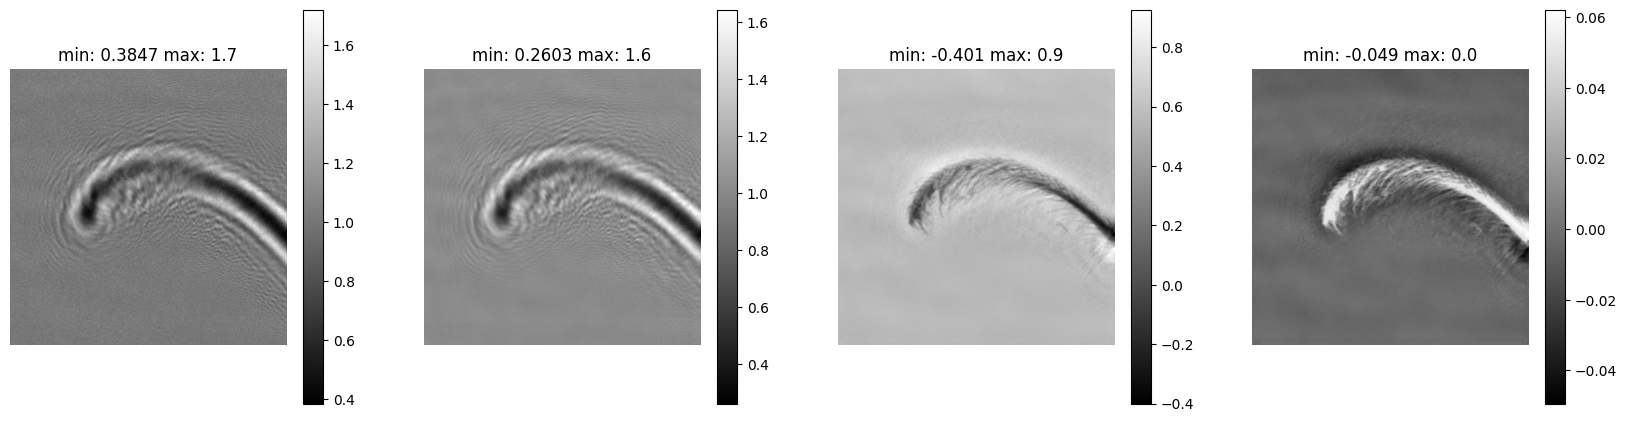

In [243]:
#******************************* TRAINING  ************************************
# we will use constant padding for the training, with abs_ratio = 0.05, iter_num = 700
# we will use the default values for the rest of the arguments
dataloader.update_values(mode = 'reflect', iter_num = 2800, change_all=True)
model = make_ganrec_model(**dataloader.get_kwargs())
gen_loss_list, dis_loss_list, propagated_intensity_list, phase_list, attenuation_list = model.train(save_model=True, save_model_path='model.pth')
fig = visualize([tensor_to_np(dataloader.transformed_images), propagated_intensity_list[-1], phase_list[-1], attenuation_list[-1]])
# model.live_plot(5) #show a video updating every 'rate' iterations

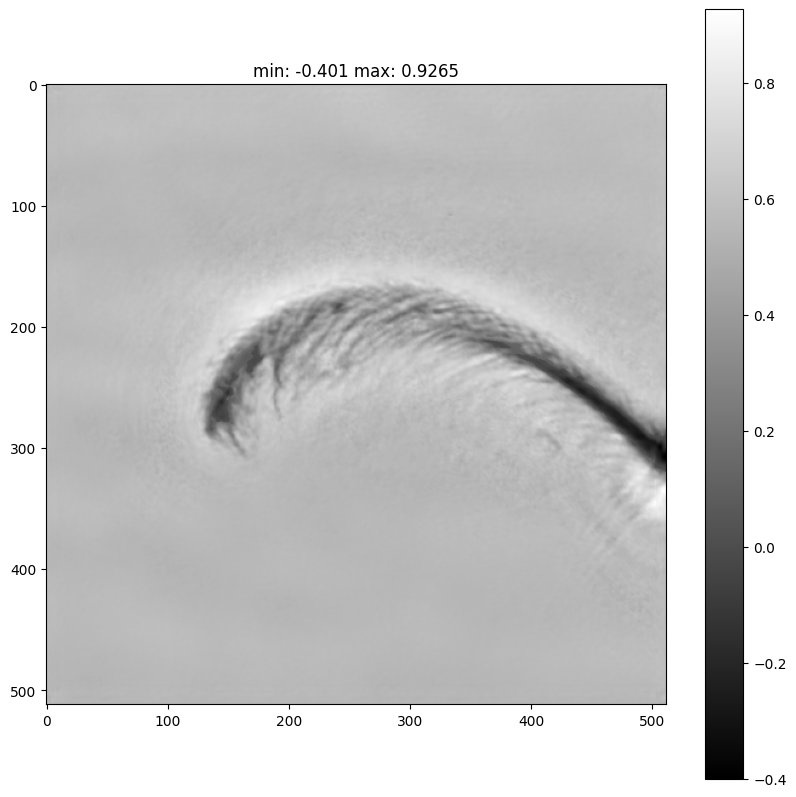

In [245]:
visualize([phase_list[-1]])